In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt, dates

In [55]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

In [156]:
gmx_arb = pd.read_csv('data/GMX_Arbitrum_Fees_2021-08-31_2022-07-05.csv')
gmx_avax = pd.read_csv('data/GMX_Avax_Fees_2022-01-06_2022-07-05.csv')
gmx_price_raw = pd.read_csv('data/gmx-usd-price.csv')
gmx_arb.head()

,Date,Swap,Margin trading,Mint GLP,Burn GLP,Liquidation,Cumulative
0,2021-08-31,0.399321,0.153256,0.118304,0.206160,0.0,0.877041
1,2021-09-01,866.365339,101.848845,4843.226667,0.033713,0.0,5812.351605
2,2021-09-02,854.002762,741.708859,1610.527787,134.264965,0.0,9152.855978
3,2021-09-03,1388.241363,3127.266851,22.380404,0.000000,0.0,13690.744595
4,2021-09-04,219.024733,768.756821,82.883759,0.000000,0.0,14761.409908


<AxesSubplot:title={'center':'Weekly GMX Revenue Avax'}, xlabel='Week', ylabel='Revenue'>

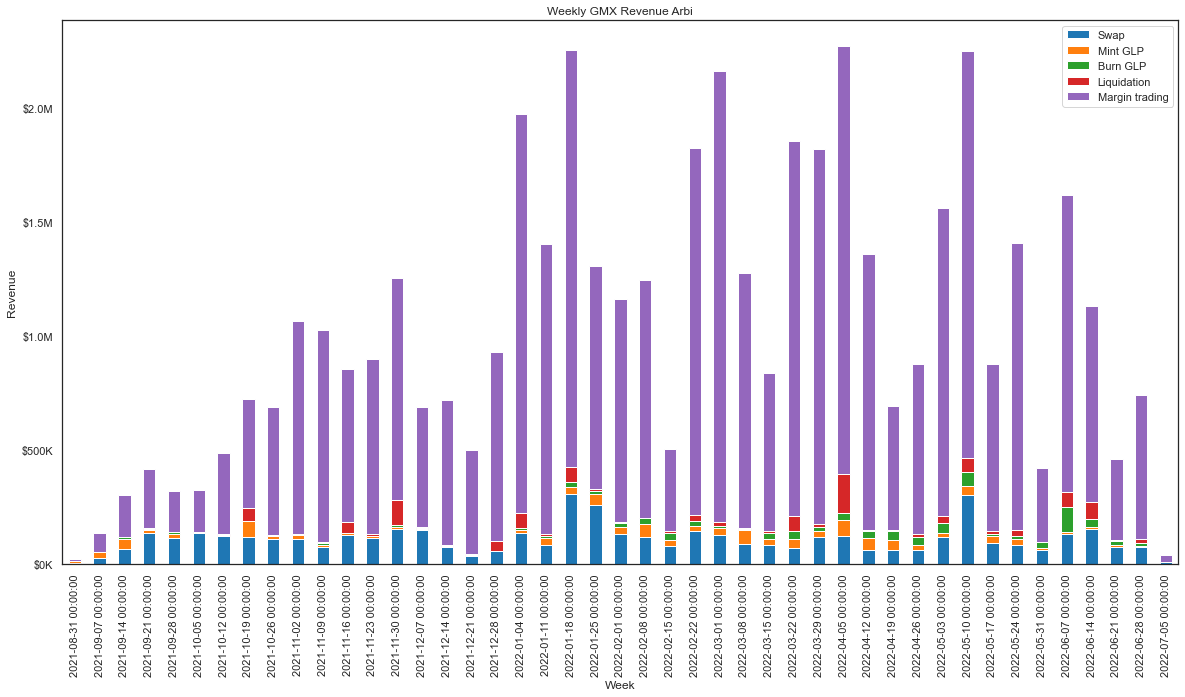

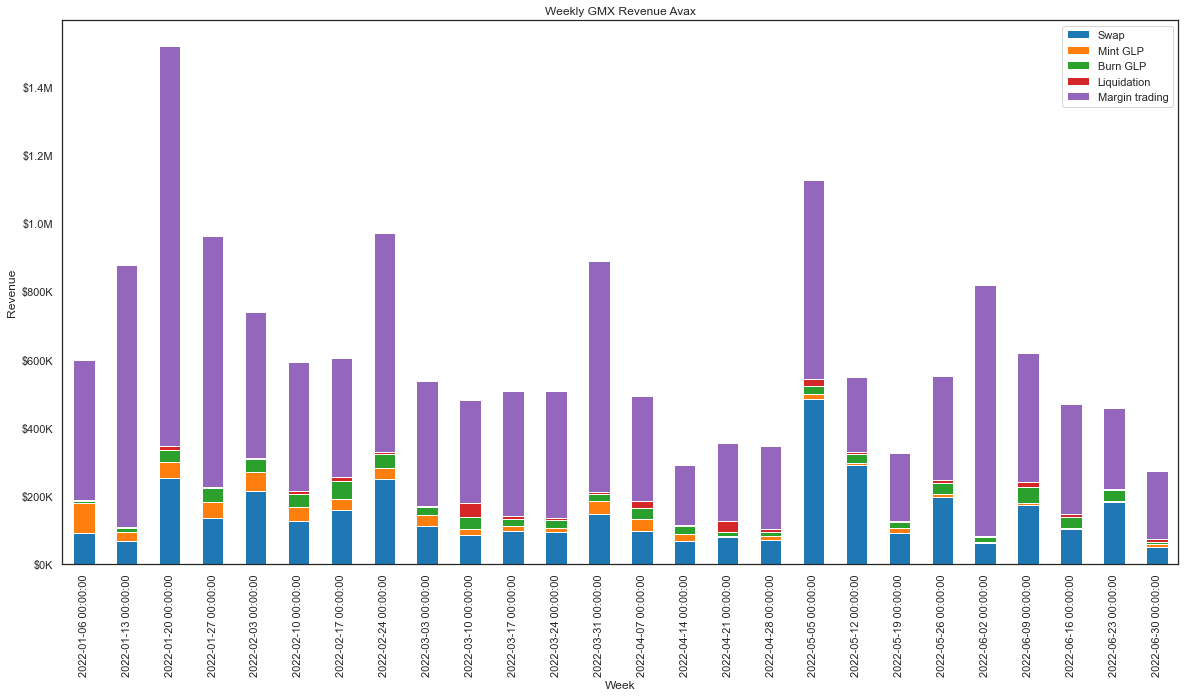

In [144]:
plt.rcParams["figure.figsize"] = [20, 10]
sns.set_theme(style="white", palette=None)

def weekly_chain_rev(chain, gmx_data):
    gmx_data.index = pd.to_datetime(gmx_data['Date'])
    gmx_data_res = gmx_data.resample('7D').sum()

    cum_fee = gmx_data_res[['Swap',  'Mint GLP', 'Burn GLP', 'Liquidation','Margin trading']].plot(kind='bar', stacked=True)
    cum_fee.set( 
           xlabel='Week', 
           ylabel='Revenue',
           title=f'Weekly GMX Revenue {chain}')
    cum_fee.yaxis.set_major_formatter(currency)
    # cum_fee_arb.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
    return cum_fee

weekly_chain_rev('Arbi', gmx_arb)
weekly_chain_rev('Avax', gmx_avax)

In [153]:
# total fees directed to gmx hodler (30%)

gmx_total_fee = pd.DataFrame(gmx_arb.drop(['Cumulative'], axis=1).sum(axis=1)*0.3)
gmx_total_fee.columns = ['GMX_fee']
gmx_total_fee

,GMX_fee
Date,
2021-08-31,0.263112
2021-09-01,1743.442369
2021-09-02,1002.151312
2021-09-03,1361.366585
2021-09-04,321.199594
...,...
2022-07-01,36373.379847
2022-07-02,12835.242511
2022-07-03,11795.073608


In [165]:
gmx_price_raw.index = pd.to_datetime(gmx_price_raw['Date'])
gmx_price_raw.index = gmx_price_raw.index.tz_localize(None)
gmx_price = gmx_price_raw.drop(['Date'], axis=1)

master_df=pd.merge(gmx_price, gmx_total_fee, left_index=True, right_index=True)
master_df

,price,GMX_fee
Date,,
2021-09-13,15.732550,6627.822342
2021-09-14,15.732550,5437.045701
2021-09-15,21.062166,7664.007147
2021-09-16,22.646664,10036.232557
2021-09-17,20.643008,9600.384627
...,...,...
2022-07-01,15.338699,36373.379847
2022-07-02,15.793477,12835.242511
2022-07-03,16.148953,11795.073608


In [152]:
gmx_price

,price
Date,
2021-09-13 00:00:00+00:00,15.732550
2021-09-14 00:00:00+00:00,15.732550
2021-09-15 00:00:00+00:00,21.062166
2021-09-16 00:00:00+00:00,22.646664
2021-09-17 00:00:00+00:00,20.643008
...,...
2022-07-03 00:00:00+00:00,16.148953
2022-07-04 00:00:00+00:00,16.461406
2022-07-05 00:00:00+00:00,17.447590
